# Fondamenti di elaborazione immagini

## _Effettuiamo l'import delle librerie utilizzate nell'esercitazione._

In [1]:
import cv2
import numpy as np
import matplotlib as mapli
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

Di seguito i riferimenti alle pagine di documentazione, sempre utiliti:

* Rif: [numpy](https://numpy.org/doc/stable/)
* Rif: [opencv](https://docs.opencv.org/)
* Rif: [matplotlib](https://matplotlib.org/stable/index.html)

Aggiungiamo alcune funzioni di utilita' per la scrittura del codice.

In [2]:
def rgb(image : np.array) -> np.array:
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gray(image : np.array) -> np.array:
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def grid(images : list[np.array], rows : int, cols : int, size : int, colors : list[str] = None) -> None:
    fig = plt.figure(figsize=(size,size))
    grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=0.1)

    if colors is not None:
        counter = B
        for ax, im in zip(grid, images):
            ax.imshow(im, cmap=colors[counter])
            counter = (counter + 1) % len(colors)
        plt.show()
    else:
        for ax, im in zip(grid, images):
            ax.imshow(im)
        plt.show()

## _Opencv mette a disposizione alcune delle operazioni morfologiche piu' utilizzate._

Il punto di partenza di molte di queste è la definizione dell'elemento strutturale, o kernel, che va poi ad eseguire il movimento di convoluzione sull'immagine sorgente, generando l'output. La definizione del kernel puo' essere fatta semplicemente con _numpy_.

* Rif: [Structuring element](https://en.wikipedia.org/wiki/Structuring_element)

In [3]:
kernel_sample = np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]])

print(kernel_sample)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


Per gli esempi successivi ci concentriamo su immagini binarie.

Dimensione: (250, 250)


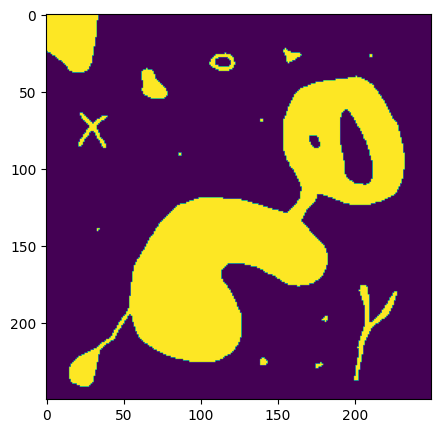

In [4]:
# carichiamo una immagine di esempio.
image = cv2.imread('./imgs/blobs.png', cv2.IMREAD_GRAYSCALE)

print(f'Dimensione: {image.shape}')
grid([image], 1, 1, 5)

## _Con opencv e' possibile eseguire l'erosione._ 

Per applicare l'erosione, possiamo partire definendo un kernel quadrato di dimensione dispari e pieno di valori ad 1.

In [5]:
se_erode_size = 5
se_erode_shape = (se_erode_size, se_erode_size)
se_erode = np.ones(se_erode_shape, np.uint8)

print(se_erode)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


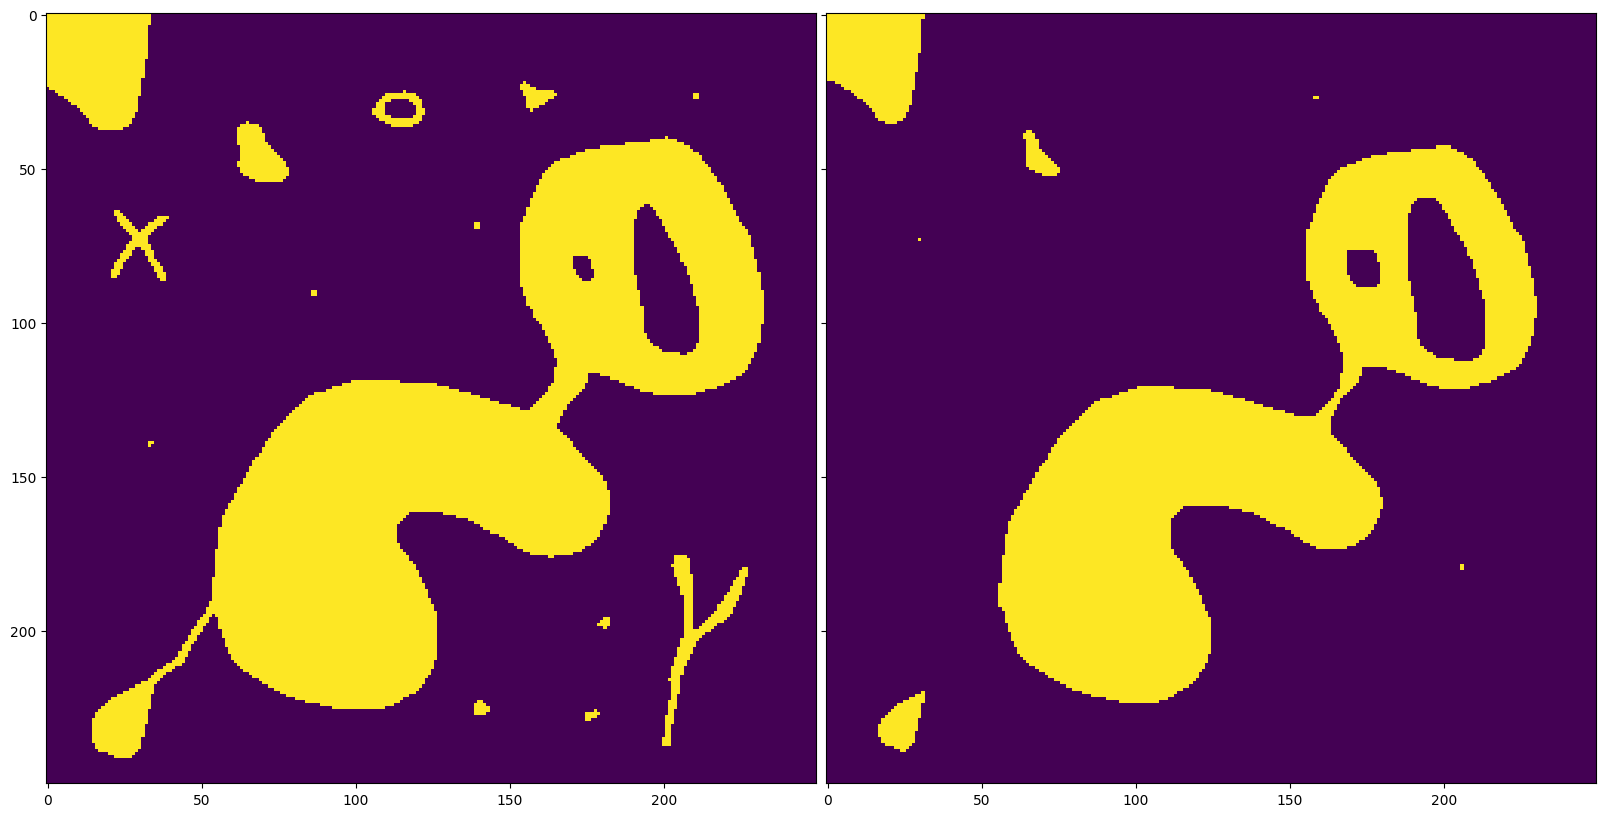

In [6]:
image_with_erode = cv2.erode(image, se_erode, iterations = 1)

grid([image, image_with_erode], 1, 2, 20)

Con il metodo _erode_ esposto da _opencv_, il kernel definito è stato fatto passare di pixel in pixel ed ha eroso tuti i pixel per i quali il vicinato non ha dato un match perfetto con l'elemento strutturale.

* Rif: [erode](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)

Possiamo provarlo con un semplice esempio in scala ridotta.

In [ ]:
kernel_sample = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]], dtype=np.uint8)

image_sample_1 = np.array([[0, 0, 0, 0, 0],
                           [0, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 0]], dtype=np.uint8)

image_sample_2 = np.array([[0, 0, 0, 0, 0],
                           [0, 0, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 0]], dtype=np.uint8)

print('\nEsempio erosione 1:\n')
print(cv2.erode(image_sample_1, kernel_sample, iterations = 1))
print('\nEsempio erosione 2:\n')
print(cv2.erode(image_sample_2, kernel_sample, iterations = 1))

Il parametro _iterations_, esposto dal metodo, permette di eseguire piu' passaggi del kernel sugli output mano a mano creati. L'applicazione di _n_ iterazioni di erode produrra' effetti ovviamente maggiori.

In [ ]:
image_with_erode = cv2.erode(image, se_erode, iterations = 5)

grid([image, image_with_erode], 1, 2, 20)

## _Con opencv e' possibile eseguire la dilatazione._

Anche in questo caso, basta definire un kernel e applicarlo con il metodo adatto esposto da _opencv_.

In [ ]:
se_dilate_size = 5
se_dilate_shape = (se_dilate_size, se_dilate_size)
se_dilate = np.ones(se_dilate_shape, np.uint8)

print(se_dilate)

In [ ]:
image_with_dilate = cv2.dilate(image, se_dilate, iterations = 1)

grid([image, image_with_dilate], 1, 2, 20)

Proviamo ora con un esempio ad-hoc.

In [ ]:
kernel_sample = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]], dtype=np.uint8)

image_sample_1 = np.array([[0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0]], dtype=np.uint8)

image_sample_2 = np.array([[0, 0, 0, 0, 0],
                           [0, 1, 0, 0, 0],
                           [0, 0, 0, 0, 0],
                           [0, 0, 0, 1, 0],
                           [0, 0, 0, 0, 0]], dtype=np.uint8)

print('\nEsempio dilatazione 1:\n')
print(cv2.dilate(image_sample_1, kernel_sample, iterations = 1))
print('\nEsempio dilatazione 2:\n')
print(cv2.dilate(image_sample_2, kernel_sample, iterations = 1))

Proviamo ad eseguire un numero maggiore di iterazioni.

In [ ]:
image_with_dilate = cv2.dilate(image, se_dilate, iterations = 3)

grid([image, image_with_dilate], 1, 2, 20)

## _Possono essere utilizzati anche elementi strutturali di default._

La creazione di un elemento struttura di default, standard, avviene dopo una richiesta fatta ad _opencv_ tramite il metodo _getStructuringElement_ ed indicando forma e dimensioni desiderate. Le forme standard disponibili sono _rettangolo_, _croce_ ed _ellisse_. Se necessario e' possibile anche 'sbilanciare' il kernel scegliendo un centro diverso da quello di default.

* Rif: [getStructuringElement](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc)
* Rif: [MorphShapes](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad)

In [ ]:
sample_kernel_size = (9,9)
sample_kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, sample_kernel_size)
sample_kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, sample_kernel_size)
sample_kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, sample_kernel_size)

In [ ]:
print(f'\nElemento strutturale, RETTANGOLO:\n{sample_kernel_rect}')

In [ ]:
print(f'\nElemento strutturale, CROCE:\n{sample_kernel_cross}')

In [ ]:
print(f'\nElemento strutturale, ELLISSE:\n{sample_kernel_ellipse}')

Se necessario, e' possibile richiedere la creazione di kernel non quadrati.

In [ ]:
sample_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 5))
print(sample_kernel)

L'anchor point, il centro, puo' venire spostato rispetto alla sua posizione di default.

In [ ]:
sample_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 5), anchor=(6, 1))
print(sample_kernel)

_**Nota**:_ il centro del kernel in una posizione differente ha effetti visivi solo su elementi a croce. In elementi come ellisse e rettangolo non si nota ma un effetto e' comunque presente: quello di connettere ogni pixel della sorgente al centro shiftato, shiftando di conseguenza anche gli output che ci si sarebbe aspettati. Lo vediamo con una dilatazione.

In [ ]:
image_sample = np.array([[0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0]], dtype=np.uint8)

print(image_sample)

In [ ]:
kernel_sample = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

print('\nEsempio dilatazione 1:\n')
print(cv2.morphologyEx(image_sample, cv2.MORPH_DILATE, kernel_sample, anchor=(-1, -1), iterations = 1))
print('\nEsempio dilatazione 2:\n')
print(cv2.morphologyEx(image_sample, cv2.MORPH_DILATE, kernel_sample, anchor=(0, 0), iterations = 1))

## _Opencv puo' combinare erosioni e dilatazioni creando operazioni avanzate._

Per fare questo, e' possibile sfruttare il metodo esposto _morphologyEx_ indicando l'input, l'operazione richiesta e il kernel. 
* L'input sara' la classica immagine tradotta come numpy array
* L'operazione va indicata fra quelle disponibili in _opencv_. ([MorphTypes](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32))
* Il kernel puo' essere ottenuto da metodo _getStructuringElement_ sceliendo fra i tipi esposti, [MorphShapes](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad), o indicandolo custom.

___
* Rif: [morphologyEx](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f)
* Rif: [getStructuringElement](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc)

Proviamo ad eseguire quindi l'erosione nei due modi indicati.

In [ ]:
kernel = np.ones((3,3), np.uint8)
image_with_erode_1 = cv2.erode(image, kernel, iterations=1)
image_with_erode_2 = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel, iterations=1)
difference = cv2.absdiff(image_with_erode_1, image_with_erode_2)

grid([image, image_with_erode_1, image_with_erode_2, difference], 1, 4, 25)

Proviamo ad eseguire quindi la dilatazione nei due modi indicati.

In [ ]:
kernel = np.ones((3,3), np.uint8)

image_with_dilate_1 = cv2.dilate(image, kernel, iterations=1)
image_with_dilate_2 = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel, iterations=1)
difference = cv2.absdiff(image_with_dilate_1, image_with_dilate_2)

grid([image, image_with_dilate_1, image_with_dilate_2, difference], 1, 4, 25)

## _L'operazione di open._

L'operazione di open, o apertura, va ad eseguire sull'immagine di input una successione di erosione e dilatazione in questo esatto ordine. E' disponibile tramite il metodo _morphologyEx_ ma puo' essere tradotta in due passi nelle singole operazioni di _erode_ e _dilate_. Definiamo quindi il kernel.

In [ ]:
kernel = np.ones((5, 5), np.uint8)
print(kernel)

In [ ]:
image_with_open_1 = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)

grid([image, image_with_open_1], 1, 2, 20)

Farlo in due passi non avrebbe cambiato il risultato.

In [ ]:
image_with_open_2 = cv2.dilate(cv2.erode(image, kernel, iterations=1), kernel, iterations=1)
difference = cv2.absdiff(image_with_open_1, image_with_open_2)

grid([image_with_open_1, image_with_open_2, difference], 1, 3, 25)

Proviamo ad eseguire piu' di una iterazione.

In [ ]:
image_with_open_1 = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=3)

grid([image, image_with_open_1], 1, 2, 20)

## _L'operazione di close._

L'operazione di close, o chiusura, va ad eseguire sull'immagine di input una successione di dilatazione ed erosione in questo esatto ordine. E' disponibile tramite il metodo _morphologyEx_ ma puo' essere tradotta in due passi nelle singole operazioni di _dilate_ e _erode_. Definiamo quindi il kernel.

In [ ]:
kernel = np.ones((5, 5), np.uint8)
print(kernel)

In [ ]:
image_with_close_1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=1)

grid([image, image_with_close_1], 1, 2, 20)

Farlo in due passi non avrebbe cambiato il risultato.

In [ ]:
image_with_close_2 = cv2.erode(cv2.dilate(image, kernel, iterations=1), kernel, iterations=1)
difference = cv2.absdiff(image_with_close_1, image_with_close_2)

grid([image_with_close_1, image_with_close_2, difference], 1, 3, 25)

Proviamo ad eseguire piu' di una iterazione.

In [ ]:
image_with_close_1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=3)

grid([image, image_with_close_1], 1, 2, 20)

## _L'operazione gradient._

L'operazione gradient, o gradiente, rappresenta la differenza fra dilatazione ed erosione dell'immagine sorgente. E' disponibile tramite il metodo _morphologyEx_ ma puo' essere tradotta in tre passi nelle singole operazioni di _dilate_ e _erode_ ed una sottrazione dei risultati. Definiamo quindi il kernel.

In [ ]:
kernel = np.ones((5, 5), np.uint8)
print(kernel)

In [ ]:
image_with_gradient_1 = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel, iterations=1)

grid([image, image_with_gradient_1], 1, 2, 20)

Farlo in tre passi non avrebbe cambiato il risultato.

In [ ]:
image_with_gradient_2 = cv2.dilate(image, kernel, iterations=1) - cv2.erode(image, kernel, iterations=1)
difference = cv2.absdiff(image_with_gradient_1, image_with_gradient_2)

grid([image_with_gradient_1, image_with_gradient_2, difference], 1, 3, 25)

## _L'operazione top-hat._

L'operazione top-hat rappresenta la differenza fra l'input e l'apertura dell'immagine sorgente. E' disponibile tramite il metodo _morphologyEx_ ma puo' essere tradotta in tre passi nelle singole operazioni di _erode_ e _dilate_ sottratti dall'input. Definiamo quindi il kernel.

In [ ]:
kernel = np.ones((5, 5), np.uint8)
print(kernel)

In [ ]:
image_with_that_1 = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=1)

grid([image, image_with_that_1], 1, 2, 20)

Farlo in tre passi non avrebbe cambiato il risultato.

In [ ]:
image_with_that_2 = cv2.subtract(image, cv2.dilate(cv2.erode(image, kernel, iterations=1), kernel, iterations=1))
difference = cv2.absdiff(image_with_gradient_1, image_with_gradient_2)

grid([image_with_that_1, image_with_that_2, difference], 1, 3, 25)

## _L'operazione black-hat._

L'operazione black-hat rappresenta la differenza fra la chiusura dell'immmagine l'input. E' disponibile tramite il metodo _morphologyEx_ ma puo' essere tradotta in tre passi nelle singole operazioni di _dilate_ e _erode_ sottratti all'input. Definiamo quindi il kernel.

In [ ]:
kernel = np.ones((5, 5), np.uint8)
print(kernel)

In [ ]:
image_with_bhat_1 = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=1)

grid([image, image_with_bhat_1], 1, 2, 20)

Farlo in tre passi non avrebbe cambiato il risultato.

In [ ]:
image_with_bhat_2 = cv2.subtract(cv2.erode(cv2.dilate(image, kernel, iterations=1), kernel, iterations=1), image)
difference = cv2.absdiff(image_with_bhat_1, image_with_bhat_2)

grid([image_with_bhat_1, image_with_bhat_2, difference], 1, 3, 25)

## _Altra operazione fondamentale, presente anche in opencv, e' la trasformazione Hit-And-Miss con la quale ricercare pattern specifici in immagini binarie._

In questo caso sara' possibile generare un kernel strutturale indicando elmenti da ignorare ed elementi/pattern da cercare che possiedano specifici valori di background e di foreground.
Iniziamo definendo l'immagine di test.

Rif: [opencv tutorial](https://docs.opencv.org/4.x/db/d06/tutorial_hitOrMiss.html)

Con B ed F andiamo ad indicare i pixel di background e foreground nell'immagine binaria di esempio.

In [ ]:
B = 0   # background
F = 255 # foreground

input_hm = np.array((
    [B, B, B, B, B, B, B, B],
    [B, F, F, F, B, B, B, F],
    [B, F, F, F, B, B, B, B],
    [B, F, F, F, B, F, B, B],
    [B, B, F, B, B, B, B, B],
    [B, B, F, B, B, F, F, B],
    [B, F, B, F, B, B, F, B],
    [B, F, F, F, B, B, B, B]), dtype="uint8")

grid([input_hm], 1, 1, 5)

Nel creare il kernel, definiamo ora i pixel di background, foreground e quelli da ignorare: B, F, e D.

In [ ]:
D = 0   # ignorati
B = -1  # background
F = 1   # foreground

kernel_hm = np.array((
        [D, F, D],
        [F, B, F],
        [D, F, D]), dtype="int")

grid([kernel_hm], 1, 1, 5)

L'applicazione della trasformazione abbiene nuovamente con _morphologyEx_ e, a cambiare, e' solamente il flag indicativo dell'operazione da effettuare.

In [ ]:
output_hm = cv2.morphologyEx(input_hm, cv2.MORPH_HITMISS, kernel_hm)

grid([input_hm, output_hm], 1, 2, 15)

Con il kernel, siamo riusciti ad individuare l'unico pixel che, ancorato, fa match esatto con il pattern. Possiamo provare a cercare anche degli spigoli.

In [ ]:
kernel_hm = np.array((
        [D, B, B],
        [F, F, B],
        [D, F, D]), dtype="int")

grid([kernel_hm], 1, 1, 5)

In [ ]:
output_hm = cv2.morphologyEx(input_hm, cv2.MORPH_HITMISS, kernel_hm)

grid([input_hm, output_hm], 1, 2, 15)

Oppure dei punti isolati.

In [ ]:
kernel_hm = np.array((
        [B, B, B],
        [B, F, B],
        [B, B, B]), dtype="int")

grid([kernel_hm], 1, 1, 5)

In [ ]:
output_hm = cv2.morphologyEx(input_hm, cv2.MORPH_HITMISS, kernel_hm)

grid([input_hm, output_hm], 1, 2, 15)